<a href="https://colab.research.google.com/github/daianeklein/dnc/blob/main/Telemarketing_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CREDIT SCORE CLASSIFICATION

***

## Prevendo os usuários com alta chance de deixar seu produto

### Problema de Negócio
Você trabalha em uma plataforma de telemarketing e a diretoria está preocupada com o alto índice de usuários cancelando as suas assinaturas.

Eles acreditam que é possível prever se um usuário tem mais chance de deixar o produto antes que isso aconteça, e com base nessa informação tomar ações para reduzir o churn.

Seu objetivo é criar um modelo de classificação capaz de prever se um usuário tem mais chance de cancelar a sua assinatura na plataforma ou não.

Para isso, a empresa forneceu uma base de dados em csv contendo dados sobre as contas dos clientes.

***

## Índice


1.   Packages Importing
2.   Data Importing
3.   Data Exploration
4.   Data Cleaning and Imputation
5.   Feature Selection
6.   Data Prepartion
7.   Machine Learning Models

## Packages Importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#machine learning
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, classification_report




## Data Importing

In [6]:
#importing df
df = pd.read_csv('Telecom_Churn.xls')

In [7]:
# linhas e colunas
df.shape

(7043, 21)

In [8]:
# top 5 linhas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Exploration

In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [11]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**Tratando Nulos**

Dealing with Null Values:
https://www.kaggle.com/code/hamdallak/dealing-with-null-values

## Data Visualization

In [16]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

<Axes: xlabel='Churn', ylabel='count'>

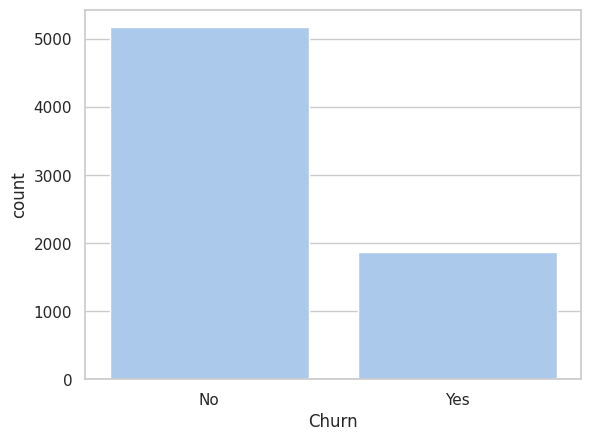

In [18]:
sns.set_theme(style="whitegrid", palette="pastel")

sns.countplot(x='Churn', data=df)

In [31]:
for column in df.columns:
  print(df[column].value_counts())
  print('\n')

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64


gender
Male      3555
Female    3488
Name: count, dtype: int64


SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64


Partner
No     3641
Yes    3402
Name: count, dtype: int64


Dependents
No     4933
Yes    2110
Name: count, dtype: int64


tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64


PhoneService
Yes    6361
No      682
Name: count, dtype: int64


MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64


InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64


OnlineSecurity
No                     3498
Yes                    2019
No inte

## Assumptions

#### 1. SeniorCitizen tendem a não cancelar o plano

### 2. Dependents == No tendem a cancelar o plano

### 3. Os serviços adicionais colaboram para Churn ou Não Churn?

In [43]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [47]:
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Churn']

df[cols]

,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,No,Yes,No,No,No,No,No
1,Yes,No,Yes,No,No,No,No
2,Yes,Yes,No,No,No,No,Yes
3,Yes,No,Yes,Yes,No,No,No
4,No,No,No,No,No,No,Yes
...,...,...,...,...,...,...,...
7038,Yes,No,Yes,Yes,Yes,Yes,No
7039,No,Yes,Yes,No,Yes,Yes,No
7040,Yes,No,No,No,No,No,No
7041,No,No,No,No,No,No,Yes


In [48]:
churn = df.query("Churn == 'Yes'")
no_churn = df.query("Churn == 'No'")

In [55]:
df.groupby('Churn')['OnlineSecurity'].value_counts(normalize=True).reset_index()

,Churn,OnlineSecurity,proportion
0,No,No,0.393699
1,No,Yes,0.333204
2,No,No internet service,0.273096
3,Yes,No,0.781701
4,Yes,Yes,0.157838
5,Yes,No internet service,0.060460


<Axes: xlabel='Churn', ylabel='proportion'>

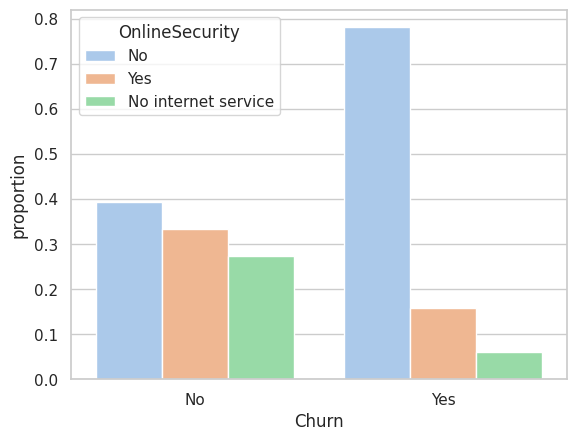

In [57]:
ax = df.groupby('Churn')['OnlineSecurity'].value_counts(normalize=True).reset_index()

sns.barplot(x='Churn', y='proportion', hue='OnlineSecurity', data=ax)

In [67]:
cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Churn']

df[cols]

OnlineBackup = df.groupby('Churn')['OnlineBackup'].value_counts(normalize=True).reset_index()
StreamingTV = df.groupby('Churn')['StreamingTV'].value_counts(normalize=True).reset_index()
StreamingMovies = df.groupby('Churn')['StreamingMovies'].value_counts(normalize=True).reset_index()

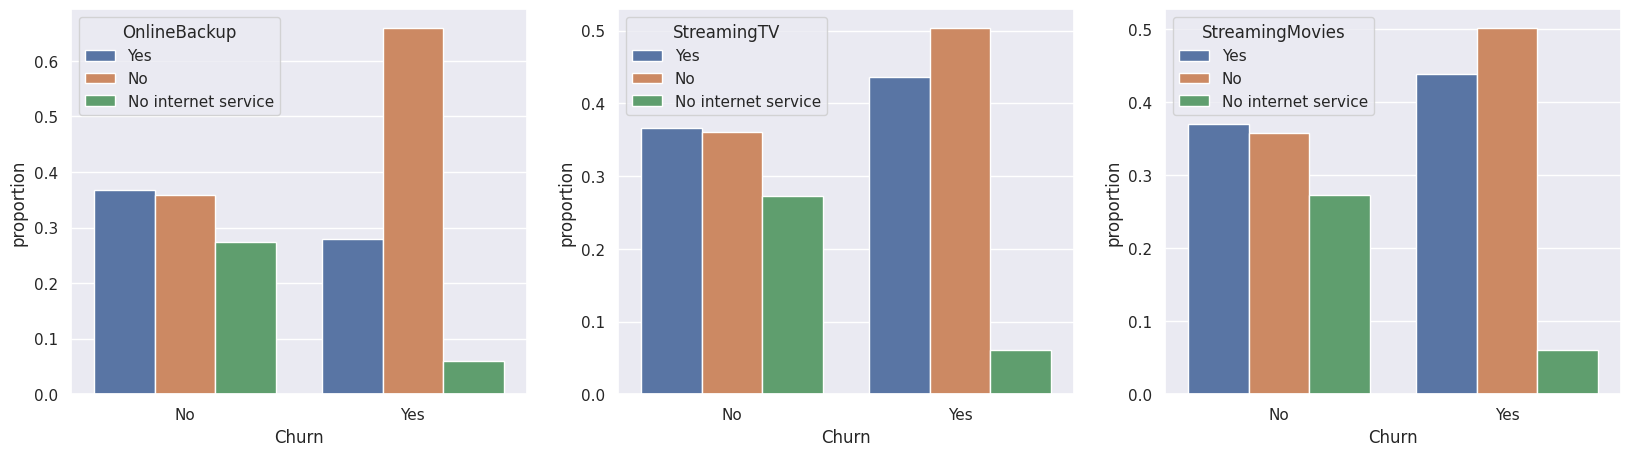

In [70]:
plt.figure(figsize = (20,5))
plt.subplot(1, 3, 1)
sns.barplot(x='Churn', y='proportion', hue='OnlineBackup', data=OnlineBackup);


plt.subplot(1, 3, 2)
sns.barplot(x='Churn', y='proportion', hue='StreamingTV', data=StreamingTV);

plt.subplot(1, 3, 3)
sns.barplot(x='Churn', y='proportion', hue='StreamingMovies', data=StreamingMovies);


In [83]:
# cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
#        'StreamingTV', 'StreamingMovies']

# plt.figure(figsize=(20, 10))

# x = 1
# for col in cols:
#   df_grouped = df.groupby('Churn')[col].value_counts(normalize=True).reset_index()
#   df_grouped = df_grouped.sort_values(by=col)

#   plt.subplot(2, 3, x)
#   sns.barplot(x='Churn', y='proportion', hue=col, data=df_grouped)
#   x += 1




## Data Cleaning and Imputation

## Feature Selection

A seleção de características é o processo de escolher as características mais relevantes e informativas de um conjunto de dados para melhorar a precisão e a eficiência dos modelos de machine learning, reduzindo a dimensionalidade e eliminando características irrelevantes ou redundantes.

### Correlation Matrix

**📝 Feature Selection - Outros Métodos**

1. Métodos de Filtro: Avaliam características com base em propriedades estatísticas como correlação ou variância.

2. Análise de Componentes Principais (PCA): Reduz a dimensionalidade transformando características em um espaço dimensional menor.

3. Importância de Características de Árvores: Modelos como Árvores de Decisão fornecem pontuações de importância de características.

4. Seleção de Características Univariadas: Seleciona características com base em testes estatísticos univariados.

## Data Preparation

Normalização é o processo de ajustar os valores das características para uma escala comum.

Encoding é a conversão de variáveis categóricas em uma forma numérica para que possam ser usadas em algoritmos de machine learning.


**📝 Normalização - Outros Métodos**


1. MinMaxScaler: Redimensiona os valores para um intervalo específico, geralmente entre 0 e 1.

2. StandardScaler: Padroniza os valores para que tenham uma média de 0 e um desvio padrão de 1.

3. Escalonamento personalizado: adapta a transformação dos dados para atender às necessidades específicas do conjunto de dados ou do problema em questão.


# Machine Learning Models

## Train Test Split

## Random Forest Classifier

Random Forest Classifier é um algoritmo de aprendizado de máquina que cria

*   Item de lista
*   Item de lista

múltiplas árvores de decisão durante o treinamento e combina suas previsões para obter uma classificação dos dados.

Referência: [Random Forest Classifier Tutorial](https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial/notebook)

## Decision Tree Classifier

Decision Tree é um algoritmo de aprendizado de máquina que divide o conjunto de dados em subconjuntos menores com base em características específicas, seguindo um processo de decisão hierárquico para fazer previsões de classe

Referência: [Decision-Tree Classifier Tutorial](https://www.kaggle.com/code/prashant111/decision-tree-classifier-tutorial)

📝 Outros Modelos

1. Redes Neurais Artificiais (ANN)
2. Máquinas de Vetores de Suporte (SVM)
3. K-Nearest Neighbors (KNN)
4. Gradient Boosting Machines (GBM)

## Cross-Validation


**📝 Acurácia**

1. Feature Engineering: Criação e seleção de novas features, outros métodos de normalização, etc.

2. Hyperparameter Tuning: Configurações do modelo, como parâmetros de regularização ou taxas de aprendizado

3. Ensemble Methods: Utilize ensemble methods such as bagging, boosting, or stacking. Ensemble methods combine multiple models to improve performance, often by reducing variance or bias in predictions.

4. Algorithm Selection: Teste de outros modelos de Machine Learning ou Deep learning.

5. Imbalanced Data Handling: Técnicas como oversampling, undersampling ou algoritmos específicos para lidar com esse desbalanceamento

6. Análise de Erros: Realize uma análise detalhada dos erros do modelo para identificar áreas de melhoria e entender os tipos de erros cometidos.

7. Conhecimento de negócio: Incorpore conhecimento específico do domínio no processo de modelagem.